In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,6)

<h1>Linear Least Squares</h1>

We want to measure the strength of a relationship - similar to what we did with correlation, but we'll take it a bit further here. 

We'll start by taking a look at some datasets and some best fit lines. All of the sets below have identical mean/std/correlation and generate the exact same best fit line. But all lines do not appear to be created equal...

<h1>線性最小二乘法</h1>

我們想衡量關係的強度——類似於我們對相關性所做的，但我們會在這裡更進一步。

我們將從查看一些數據集和一些最佳擬合線開始。 

下面的所有集合都具有相同的均值/標準差/相關性，並生成完全相同的最佳擬合線。 但並非所有線路都生而平等……

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


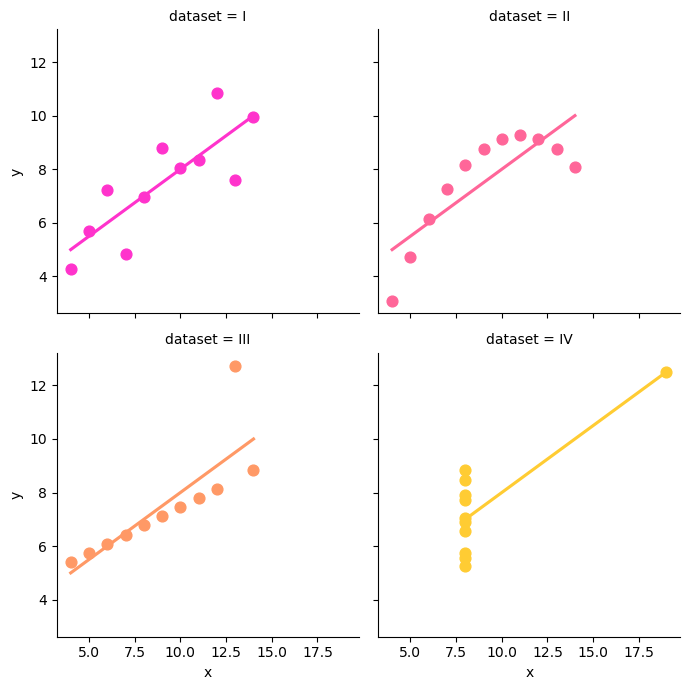

In [2]:
#Load anscombe and graph
ans = sns.load_dataset('anscombe')
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=ans, col_wrap=2, ci=None, palette='spring', size=3.5, scatter_kws={'s': 60, 'alpha': 1})

<h4>All of the above are sets of data, along with lines of best fit. (This is the nerd-famous Anscombe's Quartlet)</h1>

<b>Q: How do we determine how good the line of best fit is?</b>

A: Try to minimize the distance between the line and point. More specifically, take that distance (the residual), square it, and minimize those values. That's a process called linear least squares. 

Why?
<ul>
<li>This deals with the negatives.
<li>The 'penalizes' the bad predictions.
<li>This is computationally efficient.
<li>If the model is a good fit for the data, this is a good estimator for the intercept and slope (this should add up later)
</ul>

In more plain language, we are trying to generate a best fit line (later to be a predictive model) that minimizes the squares of the residuals - so it cuts "through the middle" of all points. In the above example, the model (line of best fit) is always the same, but how well it "fits" dataset 1 is probably more sensible than how it "fits" dataset 2. 

<b>Note:</b> the line of best fit is our model, given an input (X), it will generate a prediction (Y).

##### That's Predictive Modelling!

That process of determining the line of best fit is a small and simple example of what our future predictive algorithms all do. Here the LLS operation seeks to find a line (model) that minimizes the distance between it and all the points (the error). This is pretty much always the goal - we just normally have way more X values (features), so it is hard to visualize. 

用更通俗的語言來說，我們正在嘗試生成一條最佳擬合線（後來成為預測模型），它可以最小化殘差的平方 - 

因此它會“穿過所有點的中間”。在上面的示例中，模型（最佳擬合線）始終相同，但它“適合”數據集 1 的程度可能比它“適合”數據集 2 的程度更明智。

<b>注意：</b> 最佳擬合線是我們的模型，給定輸入 (X)，它將生成預測 (Y)。

##### 這就是預測建模！

確定最佳擬合線的過程是我們未來的預測算法所做的一切的一個小而簡單的例子。

這裡的 LLS 操作試圖找到一條線（模型），使它與所有點（誤差）之間的距離最小。

這幾乎總是目標——我們通常只是有更多的 X 值（特徵），所以很難想像。

## Realistic Example

We will look at the NBA data, and use the height to try to predict weight.  

In [3]:
#Run this for the NBA dataset. 

df = pd.read_csv("data/NBA.csv")
#df = df[df["Weight (lbs)"]>100]
#I don't want to type as much. 
h = "Height"
w = "Weight"
hw = df[['Height', 'Weight']]
hw = hw.dropna(axis=0)
hw = hw.dropna(axis=1)

Now that we have a dataset loaded, take a quick look

In [4]:
sns.scatterplot(data=hw, x=hw[h], y=hw[w])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

There's a relationship here, looks like a pretty strong one! (Note you must get rid of any nan values, or the calculations will fail and you'll get non-answers)

We'll treat height as X here. So we are creating a model that aims to predict Y, given a value of X. Or if we know someone's height, we can generate a prediction for their weight. (For this simple calculation this model could calculate in either direction with some algebra, but the separation and labeling of inputs and output is important going forward.)

Creating a regression is pretty simple, conceptually. The LeastSquares function in thinkstats takes the inputs (X) and outputs (Y) can uses them to generate the intercept and slope, which are the two values we need to build the model (y = mx + b).

In [5]:
#Do regression
inter, slope = thinkstats2.LeastSquares(hw[h], hw[w]) # Calculate model
res = thinkstats2.Residuals(hw[h], hw[w], inter, slope) # Make residual list. Used later, not needed now. 
regLine = thinkstats2.FitLine(hw[h], inter, slope) # Generate line for plotting. 
print("Y intercept:", inter)
print("Slope:", slope)

Y intercept: -136.12910230291152
Slope: 1.1932606957732677


<h4>What does this mean? Think back to high school math...</h4>

The slope is defined as the RISE/RUN, or deltaY / deltaX, or the change in weight per change in height. Here it indicates that for every 1 inch/cm (the datasets differ in units), the weight increases by SLOPE amount (in kg/lb).

The intercept is the value where x = 0, or the expected weight of a 0 height person here. This isn't really meaningful on its own here, but it does the job of giving us the defined point we need to calculate the line. Now, as long as we plug in a value for X (height) that calculation spits out a prediction for Y. 

So the end result is a predictive model for predicting Y - the height. We 'start' at the intercept for someone with a height of 0, then add one slope for each cm/inch taller that person gets. Add up all those increments (slope * height), and Bob's your uncle, that's the height prediction. In a formula WEIGHT = INTER + SLOPE * HEIGHT, or y=mx+b. 

<h4>這是什麼意思？ 回想一下高中數學……</h4>

斜率定義為 RISE/RUN，或 deltaY / deltaX，或每次高度變化時的重量變化。 

這裡表示每增加 1 英寸/厘米（數據集的單位不同），重量會增加 SLOPE 量（以千克/磅為單位）。

截距是 x = 0 時的值，或此處為 0 身高的人的預期體重。 

這在這裡本身並沒有真正意義，但它可以為我們提供計算直線所需的定義點。 

現在，只要我們為 X（高度）插入一個值，計算就會吐出對 Y 的預測。

所以最終結果是一個預測 Y - 高度的預測模型。 我們從身高為 0 的人的截距“開始”，然後為該人每高 1 厘米/英寸添加一個斜率。 

將所有這些增量（斜率 * 高度）加起來，Bob 就是你的叔叔，這就是高度預測。 

在公式中，WEIGHT = INTER + SLOPE * HEIGHT，或 y=mx+b。

In [6]:
#Graph it.
#The fitline above calculates the line for us. For an exercise, try to implement a copy of that...
sns.scatterplot(x=hw[h], y=hw[w])
sns.lineplot(x=regLine[0], y=regLine[1])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

<h3>Congrats!!! You've just built your first real life piece of Artifical Intellegence - a predictive model!! </h3>

This is what machine learning modesl do - take in what we know (height) and predict what we want (weight) Here the equation:
<ul>
<li>WEIGHT = SLOPE * HEIGHT + INTERCEPT
</ul>
Is the predictive model. You plug in the features/inputs, you get a prediction for the target. As we move to larger and more elaborate models, this basic process of creating and using a model holds:
<ol>
<li>We use some old data, where we have the answers (targets) to trail the model. This is the part where we use the data points to calculate the intercept and slope. That "calculate the intercept and slope" bit is what changes for each type of model from regression, to tree, to Bayes classification, to neural networks, etc... The math to translate from input (X values here) to output (Y values) is different, the the outcome is the same. 
<li>We test it for accuracy using some old data that we held out. We haven't done this here, we'll look at accuracy next time. 
<li>Once that model is created (i.e. we have the inter and slope) we can use it to make predictions for new data (we haven't done this yet here). To do so we plug in our inputs, and get a prediction for output. 
</ol>
<br>
We can try making some predictions with our new model...

<h3>恭喜！！！您剛剛構建了您的第一個現實生活中的人工智能——一個預測模型！！ </h3>

這就是機器學習模型所做的——接受我們所知道的（身高）並預測我們想要的（體重）這裡的等式：
<ul>
<li>重量 = 坡度 * 高度 + 截距
</ul>
是預測模型。你插入特徵/輸入，你就會得到對目標的預測。

當我們轉向更大、更精細的模型時，創建和使用模型的基本過程如下：
<ol>
<li>我們使用一些舊數據，其中我們有答案（目標）來跟踪模型。這是我們使用數據點計算截距和斜率的部分。 

“計算截距和斜率”位是每種類型模型從回歸到樹、貝葉斯分類、神經網絡等的變化......從輸入（這裡的 X 值）到輸出（Y值）不同，結果是一樣的。

<li>我們使用我們提供的一些舊數據來測試它的準確性。我們這裡沒有這樣做，下次我們會看看準確性。

<li>一旦創建了該模型（即我們有了中間值和斜率），我們就可以使用它對新數據進行預測（我們在這裡還沒有這樣做）。

為此，我們插入我們的輸入，並獲得輸出預測。
</ol>
<br>
我們可以嘗試用我們的新模型做出一些預測......

In [7]:
slope*155+inter

48.826305541944976

In [8]:
#Use the model to make predictions. 
#Try your height! See how you fit in the NBA height model. 
#It might not be accurate for you, since pro atheletes don't really represent the population at large.
#There's a lot of sample bias here.
#The model is the y = mx + b calculation:
print("A 183cm tall person is expected to be:", slope*183 + inter, "kg")
print("A 208cm tall person is expected to be:", slope*208 + inter, "kg")
print("A 175cm tall person is expected to be:", slope*175 + inter, "kg")

A 183cm tall person is expected to be: 82.23760502359647 kg
A 208cm tall person is expected to be: 112.06912241792816 kg
A 175cm tall person is expected to be: 72.69151945741032 kg


If you want a shortcut for visualizing, Seaborn has a regression plot. 

In [9]:
#Seaborn also has a built in regression plot. 
sns.regplot(x=hw[h], y=hw[w], ci=0)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

### Cool Regression Bro - Residuals. 

We can also look at the residuals to start to understand the errors a bit...

If we look at our data and the regression line, it looks like the line does a pretty good job of estimating the data, but it isn't perfect. That distance from line to point is the residual. One thing we can do here is plot the residuals to see how they are distributed. 


When looking at these residual plots, the x asis is the normal height value. Each point's y value is its distance above or below the model - which is the horizontal line of 0. 

In [10]:
#Plot residuals directly
sns.scatterplot(x=hw[h], y=res)
plt.axhline(0, color="red")

In [11]:
#Seaborn also has a built in residual plot. 
sns.residplot(x=hw[h], y=hw[w])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

<h4>What do the residuals mean? Why look at them?</h4>

If we want a model (our linear regression) that accurately fits the data, we want the residuals to be random. Or, more directly, we don't want them to have any distinctive pattern. Why? Think about it... (we also want our residuals to be roughly normal, but we'll worry about that later)
<br><br>

We can go back to the Anscombe charts from before to look a bit more at the pattern of the residuals. 

In [12]:
#Plot some residuals
tmp = ans[ans["dataset"] == "II"]
thinkplot.PrePlot(2,1,2)
sns.regplot(x=tmp["x"], y=tmp["y"], ci=0)
thinkplot.SubPlot(2)
sns.residplot(x=tmp["x"], y=tmp["y"])
thinkplot.Config()

<h4>What does this mean? Think about what we can gather from looking at the residuals and the pattern they make. </h4>

Obviously, this indicates the model does a bad job of modelling the data. Predictions at either end are way too high, predictions in the middle are way too low. 

There is consistency in the way the errors are distributed, so if we had a model that mirrored that consistency, that one would be a better fit. Ideally we'd want a model that predicted a little lower on either end of the range, and higher in the middle of the range. If there's a pattern like that in the data, we'd benefit from having that pattern in our model - we want to capture it, not leave it left over! For this one, we'd probably do a quadratic regression to better match the data's shape. 

Contrast that to set one, below. The model more or less splits the data down the middle, so the residuals are all over the place. There's no pattern to the error, so there's no big change for us to make to make it better fit the data. (This doesn't necissarily mean that it is super accurate, just that the linear model more or less fits the linear data - more on this later)

In [13]:
tmp2 = ans[ans["dataset"] == "I"]
thinkplot.PrePlot(2,1,2)
sns.regplot(x=tmp2["x"], y=tmp2["y"], ci=0)
thinkplot.SubPlot(2)
sns.residplot(x=tmp2["x"], y=tmp2["y"])
thinkplot.Config()

### Exercise

In [14]:
breath = pd.read_csv("data/predict_breathe.csv")
breath.head()

,peaks_diff,period,oxigen_per_lit
0,417.119048,1.977599,0.766094
1,186.000000,9.950663,2.665403
2,273.000000,2.441032,1.438294
3,328.333333,2.419702,1.574147
4,296.666667,2.581060,1.526147


In [15]:
intercept2, slope2 = thinkstats2.LeastSquares(breath["oxigen_per_lit"], breath["peaks_diff"])

res2 = thinkstats2.Residuals(breath["oxigen_per_lit"], breath["peaks_diff"], intercept2, slope2)
regLine = thinkstats2.FitLine(breath["oxigen_per_lit"], intercept2, slope2)

print("Y intercept:", intercept2)
print("Slope:", slope2)

Y intercept: 393.2903409874816
Slope: 48.351046855923016


We can look at the relationship between peaks_diff and oxygen_per_lit. 

In [16]:
sns.regplot(x=breath["oxigen_per_lit"], y=breath["peaks_diff"], ci=0)

<AxesSubplot:xlabel='oxigen_per_lit', ylabel='peaks_diff'>

There's a relationship. We can now plot the residuals.


Look at the very bottom right residuals. As x gets larger, the difference in the real data and predicted values of y tend to be getting lower and lower. So the model isn't reliably predicting those ones. 

This is an indication of a non-linear relationship. 

In [17]:
sns.residplot(x=breath["oxigen_per_lit"], y=breath["peaks_diff"])

<AxesSubplot:xlabel='oxigen_per_lit', ylabel='peaks_diff'>

## Using Packages for Regression

First we'll use scikitlearn, then an example of the statsmodels output of details. 

Sklearn is the "standard" predictive modelling package that we'll use most of the time. It is extremely common in the real world. The statsmodels example later (and in the book) is an alternative that is derived more from the statistics persepctive rather than the machine learning perspective (like sklearn). This means that it gives a lot more details, that we generally aren't all that worried about. It also has a different interface, which is quite different feeling than sklearn. 

In general, we want to be comfortable with the sklearn processes and usages more, as we'll use that a lot. The statsmodel stuff is more useful and relevant for stats people. 

In [18]:
#Setup
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

### Arrays and Data Prep

In order for the model to work, we need our data to be "vertical" - think of the data on a spreasheet: each feature is a vertical column, each piece of data is a row. The input varaible(s) (features) are the x values, the output (target) are the y values. The shape value shows the shape in rows x columns format. 

In this example we're using all the data to train the model. Normally we'd split it into training and testing sets, using one part to train the model, and the other to caclulate estimates of accuracy. 

#### Arrays

Arrays are another data structure that we commonly use with machine learning applications. Many, if not most, of the functions we'll use here will accept any variety of data structure, much like we're used to. This isn't true for all situations, some functions will require arrays, and others will output arrays, so we need to be comfortable with them. Arrays don't really have most of the "other stuff" that is available in a dataframe like "describe" or "head", it is more or less just a straight table of values. We can address items in an array using the index - e.g. array[1], array[1:5], array[1,3,5,7] for one dimensional arrays. 

Arrays are basically a (multi-dimensional) list of values. This is similar to a python list, but it is different. For us, the primary concern is the shape of the arrays that we have to create. We typically have two types of arrays that we use commonly (there may be several "copies", this is something we'll explore later when we look at splitting data):
<ul>
<li> Array of targets - this is [# of rows] tall, by 1 column wide. Basically slicing the target value column out of a dataframe. 
<li> Arrray of features - this is [# of rows] * [# of features]. Basically "the rest" of the dataframe. 
</ul>

These shapes will become pretty important later on, especially when we get to neural networks towards the end of next semester. 

Arrays are, in my opinion, a little less user friendly than dataframes. In our usage we'll normally convert our data into arrays around where we are done messing with it, and when it is set to be used in our modelling. There is a cheat sheet with a bunch of array operations here: [Arrays](images/arrays.png)

<b>Note:</b> generally, we could do almost anything with our data in any data structure (series, dataframes, arrays, lists, other stuff), and just convert it if needed. We'll generally try to use dataframes up until the last minute, then use arrays. This is something we're attempting to do for both ease and simplicity, not a rule. We could use almost any combo of data structures and things would work fine, and other examples or documentation we may see will do so. 

In [19]:
#Deal with data
#ensure that the inputs and outputs are the right shape.
#The -1 means basically "make it one column" in this use. 
x = np.array(hw[h]).reshape(-1,1)
y = np.array(hw[w]).reshape(-1,1)
x.shape, y.shape

((422, 1), (422, 1))

In [20]:
x,y

(array([[185. ],
        [180. ],
        [202.5],
        [205. ],
        [205. ],
        [205. ],
        [195. ],
        [195. ],
        [210. ],
        [212.5],
        [195. ],
        [215. ],
        [202.5],
        [195. ],
        [195. ],
        [202.5],
        [192.5],
        [207.5],
        [195. ],
        [187.5],
        [197.5],
        [210. ],
        [202.5],
        [210. ],
        [202.5],
        [200. ],
        [205. ],
        [192.5],
        [192.5],
        [202.5],
        [205. ],
        [192.5],
        [207.5],
        [190. ],
        [185. ],
        [187.5],
        [192.5],
        [205. ],
        [202.5],
        [205. ],
        [200. ],
        [200. ],
        [192.5],
        [200. ],
        [205. ],
        [182.5],
        [187.5],
        [195. ],
        [210. ],
        [182.5],
        [210. ],
        [202.5],
        [182.5],
        [185. ],
        [202.5],
        [202.5],
        [202.5],
        [200. ],
        [197.5

If our data is ready, all we need to do is train the model, or fit it to the data. We give it our training data so it can learn how to predict Y from X. In this fit command, most of the work of the machine learning process is being done. The function takes in the features, just the X in this case, as well as the outcome, y, and learns how to translate X -> Y via some calculation. In this case, that calculation is the linear regression process we looked at above. Our modelling follows this same basic format, with a few twists that we'll look at soon, almost every time - we prepare the data by cleaning it and filtering the parts we want, we separate the features and the target, we train a model, we evaluate its accuracy. 

In [21]:
#Generate Model
# Create an instance of a linear regression model and fit it to the data with the fit() function:
#intercept2, slope2 = thinkstats2.LeastSquares(breath["oxigen_per_lit"], breath["peaks_diff"])
model = LinearRegression().fit(x, y) 


<b>That's it! We've created a predictive model. Now we can get a result and use it. </b>

In [22]:
#Get the results of generating the model

#Note: some results come wrapped in an array, that's what the [0]s are for. Remove them to see the true return. 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)
print('Coefficient of determination (more on this later):', r_sq)
# Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 

Coefficient of determination (more on this later): 0.7115154555772258
Intercept: -136.12910230291146
Slope: 1.1932606957732674


Ok, use the model and make some predictions. I'll use the examples from above that we did by hand:

In [23]:
#Generate predictions. 
#Note - you need to provide the values to predict in an array that is one column wide. 
#Generally you'd make an array of all the things you want to predict and do them en-masse. 
print("A 183cm tall person is expected to be:", model.predict(np.array(183).reshape(-1,1))[0][0], "kg")
print("A 208cm tall person is expected to be:", model.predict(np.array(208).reshape(-1,1))[0][0], "kg")
print("A 175cm tall person is expected to be:", model.predict(np.array(175).reshape(-1,1))[0][0], "kg")

A 183cm tall person is expected to be: 82.23760502359647 kg
A 208cm tall person is expected to be: 112.06912241792816 kg
A 175cm tall person is expected to be: 72.69151945741035 kg


Lastly, we can graph it. 

In [24]:
#I'll make a df for ease of use. 
dat = pd.DataFrame(data=np.column_stack((x,y)),columns=['X','Y'])
sns.scatterplot(data=dat, x="X", y="Y")

#Generate the line
inter = model.intercept_[0]
slo = model.coef_[0][0]
inter, slo
lineInf = thinkstats2.FitLine(dat["X"], inter, slo)
sns.lineplot(x=lineInf[0], y=lineInf[1], color="red")

#Probably easier to just use a regplot! 

<AxesSubplot:xlabel='oxigen_per_lit', ylabel='peaks_diff'>

Seaborn will also do the regression for us, if we just want to see the line. 

In [25]:
sns.regplot(data=dat, x="X", y="Y")

<AxesSubplot:xlabel='X', ylabel='Y'>

#### Results

We have created a predictive learning model, yay us!. Here we've made a model to predict the target - what we have not done is the testing part to evaluate the expected amount of error. We'll look to the error part shortly.  

### Statsmodels

Statsmodels has similar functionality, but is more focused on stats (duh) and less on machine learning. This part will do exactly what we did above. 

<b>Note:</b> the "add constant" bit is required to basically tell statsmodels to have a "+ b" term in the regression. We need to do this, but not really think about it, it is just a part of the process. 

In [26]:
#Statsmodels gives us more elaborate results. 
import statsmodels.api as sm

#x = input(s)
#y = target
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.95e-115
Time:                        12:38:33   Log-Likelihood:                -1397.2
No. Observations:                 422   AIC:                             2798.
Df Residuals:                     420   BIC:                             2807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -136.1291      7.327    -18.578      0.0

Some of this is stuff that we'll look at next time, to examine accuracy and fit of this model to the data, and evaluating its usefullness in making predictions. 

And now we can use the model to make some predictions. This part is kind of odd in how it is setup with statsmodels:

In [27]:
toPred = np.array([183, 208, 175])
x_test = sm.add_constant(toPred)
ypred = est2.predict(x_test)
print(ypred)

[ 82.23760502 112.06912242  72.69151946]


## Exercise - Now You Do It!

<ul>
<li>Do a regression, both via the simple way and via a statsmodel or scikitlearn package. In particular, try to do the array arranging of data. 
<li>Chart the data with a regression line, and the residuals. Try more than one way.
<li>Use the model to make a prediction for your height, or the heights of your friends.
</ul>

In [28]:
#Run this for the NFL dataset

df2 = pd.read_csv("data/NFL.csv")
df2 = df2[df2["Weight (lbs)"]>100]
#I don't want to type as much. 
h2 = "Height (inches)"
w2 = "Weight (lbs)"
#df.columns
hw2 = df2[['Height (inches)', 'Weight (lbs)']]
hw2 = hw2.dropna(axis=0)
hw2 = hw2.dropna(axis=1)

In [29]:
#Go....
sns.scatterplot(data=hw2, x=h2, y=w2)


<AxesSubplot:xlabel='X', ylabel='Y'>

##### LLS/By Hand/Thinkstats

In [30]:
int2, slope2 = thinkstats2.LeastSquares(hw2[h2], hw2[w2])
int2, slope2

(-622.9801837381096, 11.600124927593676)

In [31]:
def estWeight(x):
    return slope2*x+int2

In [32]:
estWeight(73)

223.82893597622865

In [33]:
resNFL = thinkstats2.Residuals(hw2[h2], hw2[w2], int2, slope2)
sns.scatterplot(y=resNFL, x=hw2[h2])
plt.axhline(0, color="red")


In [34]:
lineNFL = thinkstats2.FitLine(hw2[h2], int2, slope2)
sns.scatterplot(x=hw2[h2], y=hw2[w2])
sns.lineplot(x=lineNFL[0], y=lineNFL[1], color="red")

<AxesSubplot:xlabel='X', ylabel='Y'>

##### Statsmodels

In [35]:
x2 = hw2[h2]
y2 = hw2[w2]
X2 = sm.add_constant(x2)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Weight (lbs)   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:38:35   Log-Likelihood:                -81671.
No. Observations:               17021   AIC:                         1.633e+05
Df Residuals:                   17019   BIC:                         1.634e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -622.9802      6.421    -

In [36]:
nfl_pred = np.array([73, 65, 81])
pred2 = sm.add_constant(nfl_pred)
pres = est2.predict()
pres

array([200.62868612, 189.02856119, 235.4290609 , ..., 212.22881105,
       223.82893598, 223.82893598])

##### SKlearn

In [37]:
x = np.array(hw2[h2]).reshape(-1,1)
y = np.array(hw2[w2]).reshape(-1,1)
x.shape, y.shape



((17021, 1), (17021, 1))

In [38]:
modelNFL = LinearRegression().fit(x,y)

In [39]:
#what are the slope and intercept?
nflInt = modelNFL.intercept_[0]
nflInt

-622.9801837381094

In [40]:
slopeNFL = modelNFL.coef_[0][0]
slopeNFL

11.600124927593672

In [41]:
heightsToPredict = np.array([73, 65, 76, 98, 99])
heightsToPredict = heightsToPredict.reshape(5,1)
heightsToPredict

array([[73],
       [65],
       [76],
       [98],
       [99]])

In [42]:
modelNFL.predict(heightsToPredict)

array([[223.82893598],
       [131.02793656],
       [258.62931076],
       [513.83205917],
       [525.43218409]])

<b>You are now an entry level data scientist. Update the resume.</b>